In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

feature_name_df = pd.read_csv('./human_activity/UCI HAR Dataset/features.txt', sep='\s+', header = None, names =['column_index', 'column_name'] )


<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
C:\Users\lee.eunjeong\AppData\Local\Temp\ipykernel_17972\4110516373.py:5: SyntaxWarning: invalid escape sequence '\s'
  feature_name_df = pd.read_csv('../human_activity/UCI HAR Dataset/features.txt', sep='\s+', header = None, names =['column_index', 'column_name'] )


In [2]:
def get_new_feature_name_df(old_feature_name_df) :
    feature_dup_df = pd.DataFrame( data = old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'] )
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0] + '_' +str(x[1])
                                                                                              if x[1] > 0 else x[0], axis = 1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df


def get_human_dataset () :
    feature_name_df = pd.read_csv('../human_activity/UCI HAR Dataset/features.txt', sep='\s+', header = None, names =['column_index', 'column_name'] )

    new_feature_name_df = get_new_feature_name_df(feature_name_df)

    # DataFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()

    # 학습 피처 데이터세트와 테스트 피처 데이터를 DataFrame으로 로딩. 컬럼명 Feature_name 적용.
    X_train = pd.read_csv('../human_activity/UCI HAR Dataset/train/X_train.txt', sep='\s+', names = feature_name)
    X_test = pd.read_csv('../human_activity/UCI HAR Dataset/test/X_test.txt', sep='\s+', names = feature_name)

    y_train = pd.read_csv('../human_activity/UCI HAR Dataset/train/y_train.txt', sep='\s+', header=None, names = ['action'] )
    y_test = pd.read_csv('../human_activity/UCI HAR Dataset/test/y_test.txt', sep='\s+', header=None, names = ['action'] )

    return X_train, X_test, y_train, y_test


<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:20: SyntaxWarning: invalid escape sequence '\s'
<>:21: SyntaxWarning: invalid escape sequence '\s'
<>:23: SyntaxWarning: invalid escape sequence '\s'
<>:24: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:20: SyntaxWarning: invalid escape sequence '\s'
<>:21: SyntaxWarning: invalid escape sequence '\s'
<>:23: SyntaxWarning: invalid escape sequence '\s'
<>:24: SyntaxWarning: invalid escape sequence '\s'
C:\Users\lee.eunjeong\AppData\Local\Temp\ipykernel_17972\2080258847.py:12: SyntaxWarning: invalid escape sequence '\s'
  feature_name_df = pd.read_csv('../human_activity/UCI HAR Dataset/features.txt', sep='\s+', header = None, names =['column_index', 'column_name'] )
C:\Users\lee.eunjeong\AppData\Local\Temp\ipykernel_17972\2080258847.py:20: SyntaxWarning: invalid escape sequence '\s'
  X_train = pd.read_csv('../human_activity/UCI HAR Dataset/train/X_train.txt', sep='\s+', names = featu

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

In [4]:
# 랜덤포레스트 학습 / 예측 / 성능평가
rf_clf = RandomForestClassifier(random_state = 0, max_depth=8)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤포레스트 정확도 : {0:.4f}'.format(accuracy))

랜덤포레스트 정확도 : 0.9196


In [5]:
# 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth':[8, 16, 24]
    , 'min_samples_leaf':[1, 6, 12]
    , 'min_samples_split':[2, 8, 16]
}

rf_clf = RandomForestClassifier(random_state = 0, n_estimators = 100, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs = -1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터 : \n', grid_cv.best_params_)
print('최고 예측 정확도 : {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터 : 
 {'max_depth': 16, 'min_samples_leaf': 6, 'min_samples_split': 2}
최고 예측 정확도 : 0.9165


In [6]:
## 최적 하이퍼 파라미터 적용
rf_clf1 = RandomForestClassifier(random_state = 0, n_estimators = 100, min_samples_leaf=6, max_depth = 16, min_samples_split = 2)

rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print('예측정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)))

예측정확도 : 0.9260


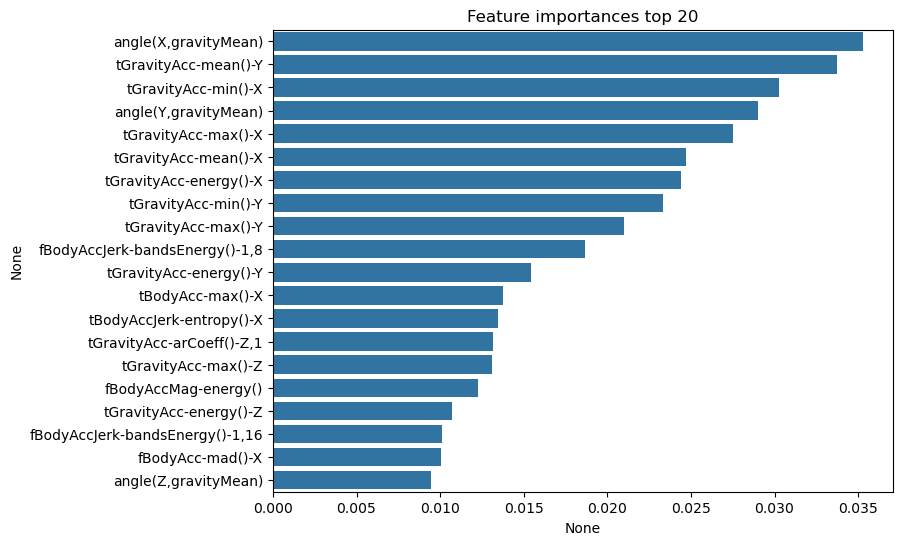

In [7]:
# 피쳐 중요도 막대그래프 시각화
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending = False)[:20]

plt.figure(figsize = (8, 6))
plt.title('Feature importances top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

In [8]:
### GBM ( Grandient Boosting Machine )
from sklearn.ensemble import GradientBoostingClassifier
import time

X_train, X_test, y_train, y_test = get_human_dataset()

#GBM수행시간 측정. 시작 시간 설정
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

In [10]:
print('GBM 정확도 : {0:.4f}'.format(gb_accuracy))
print('GBM 수행시간 : {0:.1f}초'.format(time.time() - start_time))

GBM 정확도 : 0.9393
GBM 수행시간 : 1968.0초


In [12]:
1968/60

32.8